 # $Analisis\ exploratorio\ trocafone\ -Origenes\ $
 

### Importamos las librerias necesarias y procedemos a leer el csv

In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/home/barbara/Documentos/datos/tarea/fiuba-trocafone-tp1-final-set/events.csv')

/home/barbara/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### El largo del dataframe es de:

In [4]:
len(df)

1011288

### Mostramos una fila

In [5]:
df.sample(1)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
575223,2018-06-14 02:20:21,checkout,9339f2d1,NaN,2710,iPhone 5,Bom,16GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mostramos el tipo de cada columna del dataframe

In [6]:
df.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

### Limpiamos los datos

#### Importamos calendar, convertimos la columna timestamp en datetime, mapeamos Year de timestamp, lo mismo con Weekday, y Hour. Generando variables discretas en otras columnas.

In [5]:
# Le agregamos 3 columnas, una de año, otra de dia de la semana y otra de hora.
import calendar
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Year'] = df['timestamp'].map(lambda x:x.year)
df['Weekday'] = df['timestamp'].map(lambda x:x.weekday_name)
df['Hour'] = pd.to_datetime(df['timestamp'], format='%H:%M',errors='coerce').dt.hour




/home/barbara/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """


### Creamos una categoria de ordenamiento para los días de la semana y se la asignamos.

In [27]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Weekday'] = df['Weekday'].astype('category', categories=cats, ordered=True)

/home/barbara/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


### Tenemos una info del nuevo dataframe generado

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011288 entries, 0 to 1011287
Data columns (total 26 columns):
timestamp                   1011288 non-null datetime64[ns]
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region            

### Comenzamos con el analisis; agrupamos por hora y contamos los eventos por cada una de estas.

Text(0,0.5,'Eventos')

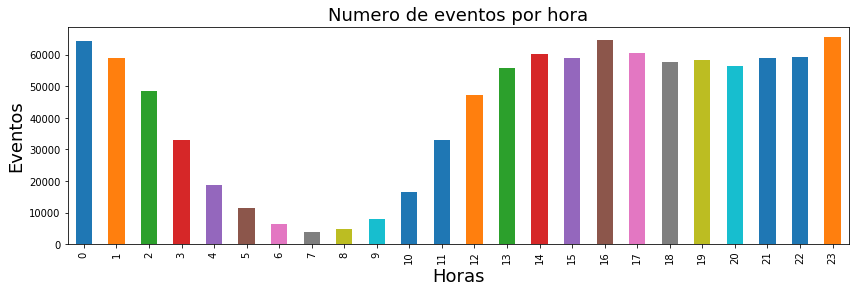

In [4]:
# Numero de eventos por hora
plotEH = df.groupby('Hour').count()['event'].plot(kind='bar',figsize=(14,4));

plotEH.set_title("Numero de eventos por hora", fontsize=18)
plotEH.set_xlabel("Horas",fontsize=18)
plotEH.set_ylabel("Eventos", fontsize=18)


#### Aca tenemos una tabla numerica para representar con más detalle el gráfico

In [25]:
df.groupby('Hour').count()['event']

Hour
0     64378
1     58978
2     48536
3     33118
4     18838
5     11335
6      6257
7      3910
8      4623
9      8077
10    16639
11    32884
12    47426
13    55684
14    60211
15    58852
16    64637
17    60560
18    57614
19    58398
20    56378
21    58867
22    59412
23    65676
Name: event, dtype: int64

#####  Para este tipo de analisis observamos que los eventos a través del día crecen a partir de las 7hs hasta las 14hs, desde ese momento la cantidad de eventos comienzan a oscilar levemente hasta las 23pm (donde la cantidad de eventos es elevada), y desde ahi comienza la etapa decreciente hasta las 7hs. Podemos concluir que a las 23hs se produce el máximo de eventos, y el minimo de eventos se produce a las 7hs.

### Lo mismo pero en vez de horas, días de la semana.

Text(0,0.5,'Eventos')

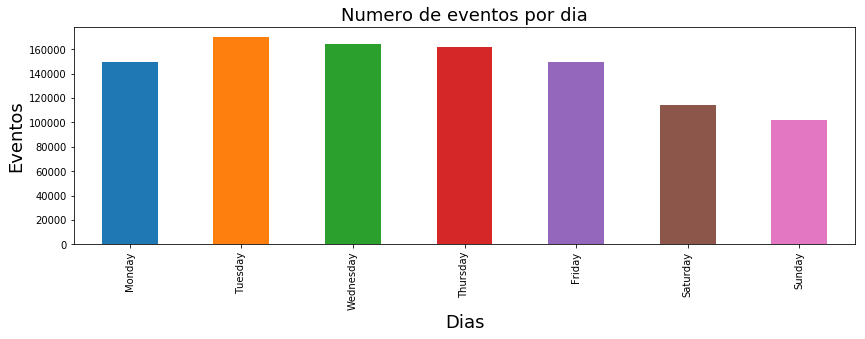

In [5]:
# Numero de eventos por dia

plotED=df.groupby('Weekday').count()['event'].plot(kind='bar',figsize=(14,4));

plotED.set_title("Numero de eventos por dia", fontsize=18)
plotED.set_xlabel("Dias",fontsize=18)
plotED.set_ylabel("Eventos", fontsize=18)

In [28]:
df.groupby('Weekday').count()['event']

Weekday
Monday       149385
Tuesday      170020
Wednesday    164323
Thursday     161868
Friday       149371
Saturday     114612
Sunday       101709
Name: event, dtype: int64

##### La cantidad de eventos a través de los días de la semana toman el máximo el día martes, comienzan a decrecer hasta el día domingo, y vuelve a tomar un valor más elevado el lunes, donde hasta el martes crece para retomar el valor máximo. 

### Filtramos los paises que no tienen nombre, contamos la cantidad de eventos generados en los diferenes paises. Ploteamos.

#### Hacemos los eventos en escala logaritmica para poder apreciar mejor los datos de los demás paises (demás respecto de Brasil que tiene muchos más eventos) , y poder comparar mejor.

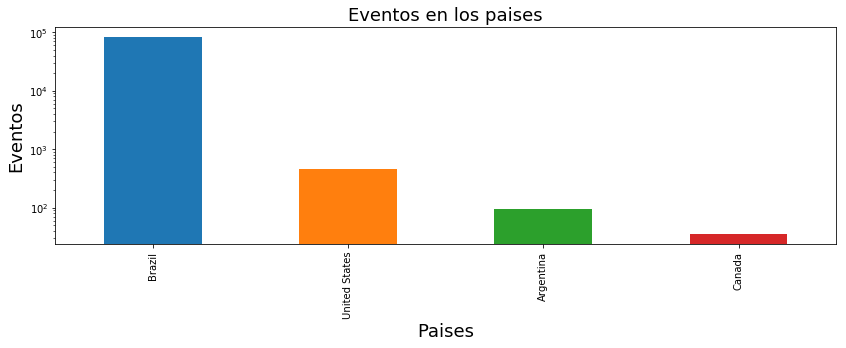

In [18]:
#paises y eventos
dfFiltrado = df.loc[df['country'] != 'Unknown', :]

#plotC=df.groupby('country').count()['event'].plot(kind='bar',figsize=(14,4));
#Este hace algo parecido

plotC=dfFiltrado['country'].value_counts()[0:4].plot(kind='bar',figsize=(14,4));
plotC.set_title("Eventos en los paises", fontsize=18)
plotC.set_xlabel("Paises",fontsize=18)
plotC.set_ylabel("Eventos", fontsize=18)
plotC.set_yscale('log')



In [29]:
dfFiltrado['country'].value_counts()

Brazil                84308
United States           465
Argentina                94
Canada                   35
Netherlands              13
France                   13
United Kingdom           12
Mozambique               12
Japan                    11
Poland                    9
French Guiana             8
Portugal                  7
Romania                   7
Italy                     7
Dominican Republic        6
Guadeloupe                6
Russia                    6
Germany                   5
Colombia                  4
Paraguay                  4
Bangladesh                4
Switzerland               3
Angola                    2
Morocco                   2
India                     2
Algeria                   1
Saudi Arabia              1
South Africa              1
Peru                      1
Ireland                   1
Belize                    1
Uzbekistan                1
Israel                    1
Mexico                    1
Cape Verde                1
Zimbabwe            

##### Para analizar la originalidad de los eventos respecto lugar geográfico comparamos la cantidad de eventos realizados en los diferentes países que aparecen en el archivo, se puede observar que Brasil es el que más eventos tiene, y los demás son despreciables respecto a este, de todos modos se ha comparado en una escala logarítmica para poder apreciar los demás paises.

### Hacemos lo mismo para las diferentes regiones

Text(0,0.5,'Eventos')

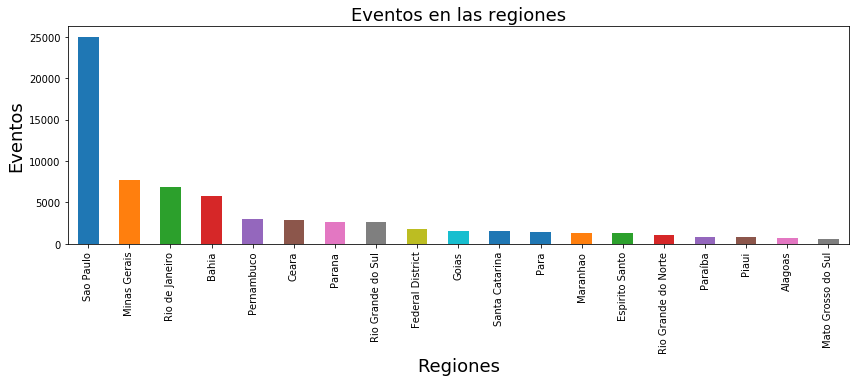

In [32]:
#regiones y eventos
dfFiltrado = df.loc[df['region'] != 'Unknown', :]
plotR=dfFiltrado['region'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotR.set_title("Eventos en las regiones", fontsize=18)
plotR.set_xlabel("Regiones",fontsize=18)
plotR.set_ylabel("Eventos", fontsize=18)

In [36]:
dfFiltrado['region'].value_counts()[0:30]

Sao Paulo              24996
Minas Gerais            7755
Rio de Janeiro          6913
Bahia                   5737
Pernambuco              2962
Ceara                   2829
Parana                  2602
Rio Grande do Sul       2576
Federal District        1739
Goias                   1564
Santa Catarina          1511
Para                    1382
Maranhao                1303
Espirito Santo          1257
Rio Grande do Norte     1064
Paraíba                  875
Piaui                    824
Alagoas                  751
Mato Grosso do Sul       618
Amazonas                 600
Tocantins                596
Mato Grosso              487
Sergipe                  405
Rondonia                 273
California               199
Amapa                    148
New York                 105
Acre                      96
Buenos Aires F.D.         76
Roraima                   67
Name: region, dtype: int64

##### Cuando comparamos por regiones, podemos observar que estas son pertenecientes a Brasil; Sao Paulo como principal generadora de eventos (24996) , siguiendo de Minas Gerais (7755) , Rio de Janeiro (6913), Bahia (5737) y podemos seguir observando en el análisis las demás regiones. 

### Otra vez para las diferentes ciudades.

Text(0,0.5,'Eventos')

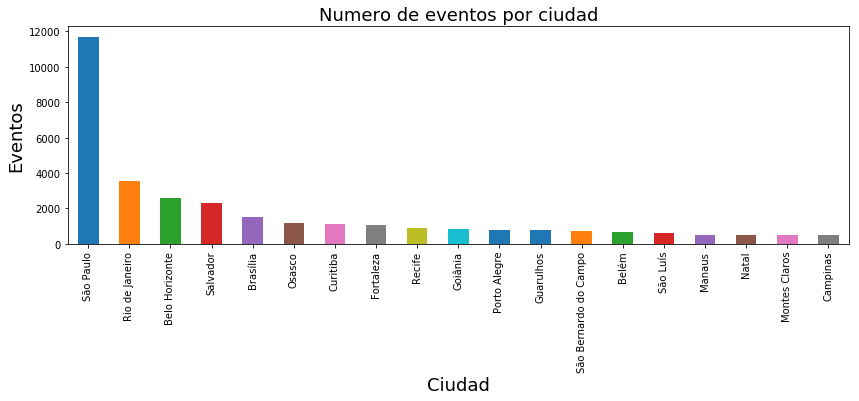

In [18]:
#ciudades y eventos
dfFiltrado = df.loc[df['city'] != 'Unknown', :]
plotF=dfFiltrado['city'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));

plotF.set_title("Numero de eventos por ciudad", fontsize=18)
plotF.set_xlabel("Ciudad",fontsize=18)
plotF.set_ylabel("Eventos", fontsize=18)

### Filtramos los eventos que no son compra, y creamos un nuevo dataframe, se muestra a continuacion

In [38]:
compras = df.loc[df.event.str.contains('conversion'),:]
compras
#dataframe de los eventos que son "conversion" (Compras)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,Year,Weekday,Hour
220,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Tuesday,17
2282,2018-04-26 22:28:53,conversion,00c13dee,NaN,6650,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Thursday,22
2547,2018-06-10 14:37:50,conversion,00fdbb4b,NaN,3348,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Sunday,14
4245,2018-03-16 13:50:25,conversion,0146a9df,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Friday,13
6985,2018-02-09 22:07:07,conversion,01db2fe6,NaN,6357,Samsung Galaxy J5,Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Friday,22
10005,2018-05-17 02:20:29,conversion,02a6f9b5,NaN,3203,Samsung Galaxy A5,Bom,16GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Thursday,2
14236,2018-01-09 16:47:50,conversion,03bdcd81,NaN,3301,Samsung Galaxy S6 Edge,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Tuesday,16
15278,2018-05-15 02:31:34,conversion,042a2a99,NaN,15745,LG K10 Novo,Excelente,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Tuesday,2
16800,2018-01-23 22:26:36,conversion,04850add,NaN,2830,iPhone 6,Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Tuesday,22
18502,2018-01-10 18:59:05,conversion,04fbc241,NaN,6370,Samsung Galaxy J5,Muito Bom,16GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Wednesday,18


### Creamos un grafico de barras de las compras agrupadas por hora.

Text(0,0.5,'Compra')

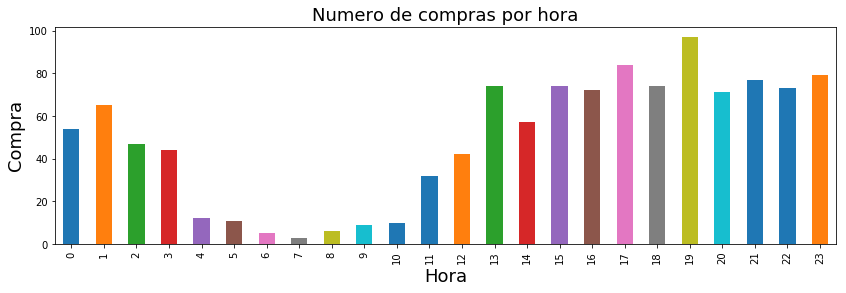

In [39]:

plotH=compras.groupby('Hour').count()['event'].plot(kind='bar',figsize=(14,4));
#numero de compras por hora
plotH.set_title("Numero de compras por hora", fontsize=18)
plotH.set_xlabel("Hora",fontsize=18)
plotH.set_ylabel("Compra", fontsize=18)

In [40]:
compras.groupby('Hour').count()['event']

Hour
0     54
1     65
2     47
3     44
4     12
5     11
6      5
7      3
8      6
9      9
10    10
11    32
12    42
13    74
14    57
15    74
16    72
17    84
18    74
19    97
20    71
21    77
22    73
23    79
Name: event, dtype: int64

##### Ahora nos dedicaremos a analizar los eventos compra, también por hora y días de la semana. Podemos observar que a comparación de la totalidad de eventos estos son despreciables, vamos hacer un zoom y analizarlos; empezando por las 7hs vemos un crecimiento hasta las 13hs, a las 14hs vemos una recaída, que luego mejorará pero se mantendrá oscilando hasta la  1h, dentro de los horarios oscilantes podemos observar un máximo a las 19hs, después de la 1h podemos observar que las compras comienzan a decrecer hasta llegar a las 7hs al mínimo de compras (recordar que para los eventos el mínimo es el mismo) .

### Lo mismo pero agrupado por días de la semana

Text(0,0.5,'Compras')

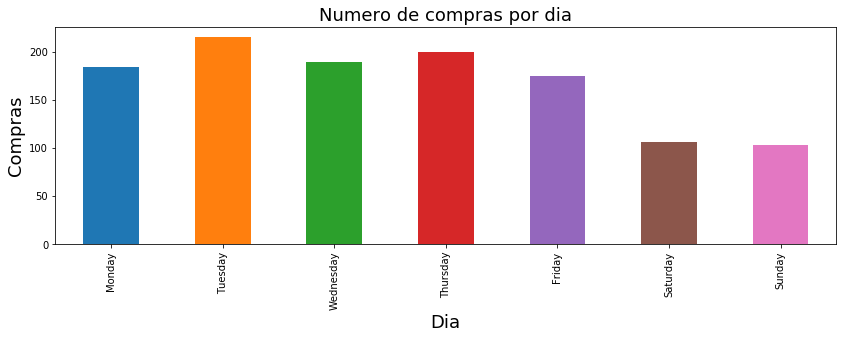

In [9]:
plotD=compras.groupby('Weekday').count()['event'].plot(kind='bar',figsize=(14,4));
plotD.set_title("Numero de compras por dia", fontsize=18)
plotD.set_xlabel("Dia",fontsize=18)
plotD.set_ylabel("Compras", fontsize=18)
#numero de compras por dia de la semana

In [41]:
compras.groupby('Weekday').count()['event']

Weekday
Monday       184
Tuesday      215
Wednesday    189
Thursday     200
Friday       175
Saturday     106
Sunday       103
Name: event, dtype: int64

##### Para los días de la semana las compras se perciben más los martes (mismo máximo que los eventos), oscila hasta el jueves y comienza a decrecer hasta el domingo, donde comienza a crecer nuevamente hasta llegar al máximo.

### Vamos analizar todos los tipos de eventos que ocurren en 1 año en particular (2018); no hay más años en el dataframe para comparar.

#### Lo hacemos en escala logaritmica para poder apreciar mejor los datos, ya que el evento: mirar productos es bastante mas alto.

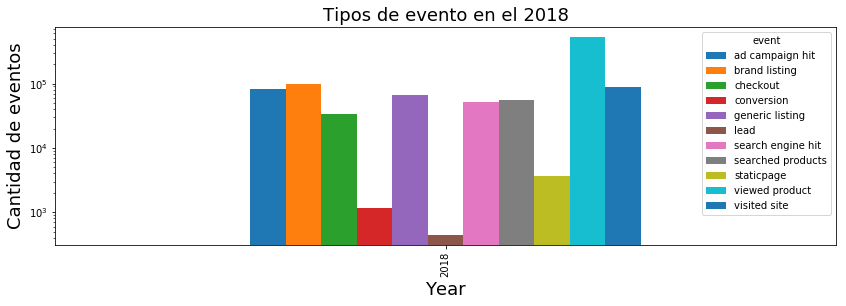

In [6]:
#Analisis por año de los diferentes eventos

# tipo de eventos por año (2018)...

plot=pd.crosstab(df.Year, df.event).plot(kind='bar',figsize=(14,4));
plot.set_title("Tipos de evento en el 2018", fontsize=18)
plot.set_xlabel("Year",fontsize=18)
plot.set_ylabel("Cantidad de eventos", fontsize=18)
plot.set_yscale('log')




### Creamos una tabla para el analisis de los diferentes tipos de eventos en el año, y obtener numeros.

In [15]:
pd.crosstab(df.Year, df.event)

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
Year,,,,,,,,,,,
2018,82827,98635,33735,1172,67534,448,50957,56073,3598,528931,87378


##### Si analizamos los diferentes tipos de eventos que pueden ocurrir en un año, podremos observar que el evento que más se produce es “ver un producto”, este a su vez es mucho más grande que los demás eventos, por eso para el gráfico se ajusta a una escala logarítmica. Observamos entonces el mínimo con más claridad, y este es “lead”.

### Comparamos los diferentes tipos de eventos por cada dia de la semana

Text(0,0.5,'Cantidad de eventos')

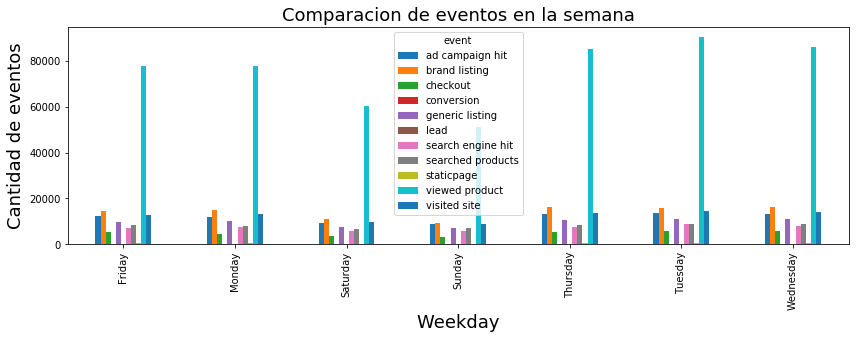

In [10]:

plot=pd.crosstab(df.Weekday, df.event).plot(kind='bar',figsize=(14,4));
plot.set_title("Comparacion de eventos en la semana", fontsize=18)
plot.set_xlabel("Weekday",fontsize=18)
plot.set_ylabel("Cantidad de eventos", fontsize=18)



### Creamos una tabla para el analisis de los diferentes tipos de eventos en cada día de la semana

In [16]:
pd.crosstab(df.Weekday, df.event)


event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
Weekday,,,,,,,,,,,
Monday,11902,15067,4621,184,10236,90,7696,8184,658,77653,13094
Tuesday,13757,15997,5928,215,11037,64,8653,8741,724,90410,14494
Wednesday,13357,16202,5772,189,11012,75,8110,8776,574,86051,14205
Thursday,13130,16340,5559,200,10603,60,7646,8551,599,85396,13784
Friday,12395,14731,5244,175,9761,64,7331,8328,464,77947,12931
Saturday,9493,11053,3474,106,7615,45,5871,6586,265,60313,9791
Sunday,8793,9245,3137,103,7270,50,5650,6907,314,51161,9079


### Comparamos los diferentes tipos de eventos por cada hora

Text(0,0.5,'Cantidad de eventos')

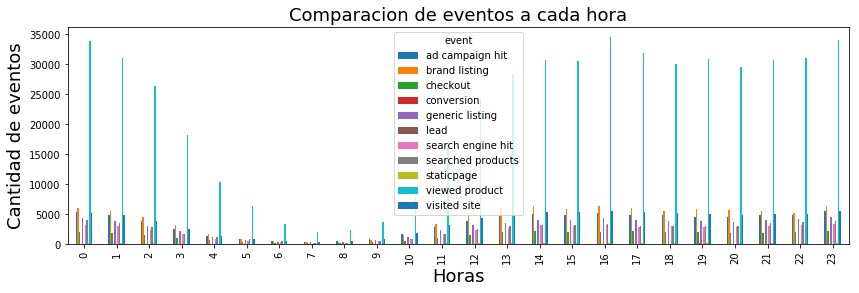

In [12]:
plotHora=pd.crosstab(df.Hour, df.event).plot(kind='bar',figsize=(14,4));
plotHora.set_title("Comparacion de eventos a cada hora", fontsize=18)
plotHora.set_xlabel("Horas",fontsize=18)
plotHora.set_ylabel("Cantidad de eventos", fontsize=18)


### Creamos una tabla para obtener valores mas precisos

In [19]:
pd.crosstab(df.Hour, df.event)

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
Hour,,,,,,,,,,,
0,5415,5954,2035,54,4358,19,3166,3964,240,33943,5230
1,4918,5529,1924,65,3897,5,2986,3484,171,31106,4893
2,3826,4506,1549,47,3049,4,2361,2806,162,26410,3816
3,2449,3239,1048,44,2140,1,1617,1730,90,18233,2527
4,1340,1667,625,12,1210,1,900,1220,70,10375,1418
5,772,913,362,11,723,2,531,789,54,6371,807
6,439,497,228,5,423,3,298,493,16,3394,461
7,327,374,153,3,279,7,209,224,14,1948,372
8,443,391,167,6,311,10,250,256,19,2319,451


##### Se creó una tabla para obtener más detalle, sobre la comparacion de cada tipo de evento a través de los días de la semana y a cada hora del día; en esta sección no se sacarán conclusiones especificas, sino que se desarrollaran en otro apartado más profundamente. (Ver retenciones).

### Analizamos los diferentes tipos de dispositivos de donde se origino el evento

#### Filtramos los datos que no contienen informacion, creando un nuevo dataframe limpio, contamos los dispositivos y creamos un grafico de barras.

Text(0,0.5,'Cantidad de eventos')

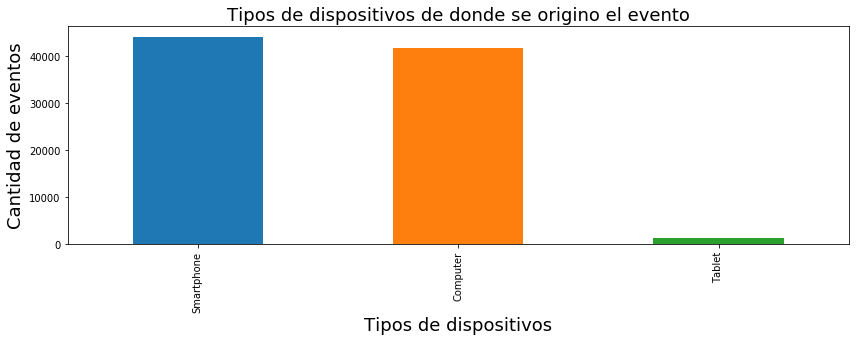

In [42]:
# tipos de dispositivos de donde se origino el evento

dfFiltrado = df.loc[df['device_type'] != 'NaN', :]
dfFiltrado = df.loc[df['device_type'] != 'Unknown', :]

plotCEL=dfFiltrado['device_type'].value_counts()[0:5].plot(kind='bar',figsize=(14,4));
plotCEL.set_title("Tipos de dispositivos de donde se origino el evento", fontsize=18)
plotCEL.set_xlabel("Tipos de dispositivos",fontsize=18)
plotCEL.set_ylabel("Cantidad de eventos", fontsize=18)


##### Analizaremos la originalidad del evento respecto del dispositivo con el que accede para producir el evento. Aclaración: Se quiso profundizar para analizar la compra y la originalidad, pero los datos fueron escasos. De este análisis se puede concluir que los smartphones son los dispositivos más comunes para entrar a la página de trocafone, aunque las computadoras compiten por el mismo puesto (44239 vs 41790),  por ultimo una tablet con 1234 eventos.

In [43]:
dfFiltrado['device_type'].value_counts()[0:5]

Smartphone    44239
Computer      41790
Tablet         1234
Name: device_type, dtype: int64

### Creamos una tabla para tener mas precision de los numeros

In [80]:
pd.crosstab(df.device_type,df.event)
# Lista de eventos, en este caso solo se lista visited site.

event,visited site
device_type,
Computer,41790
Smartphone,44239
Tablet,1234
Unknown,115


### Analisamos los diferentes tipos de resoluciones del dispositivo donde se origino el evento

Text(0,0.5,'Cantidad de eventos')

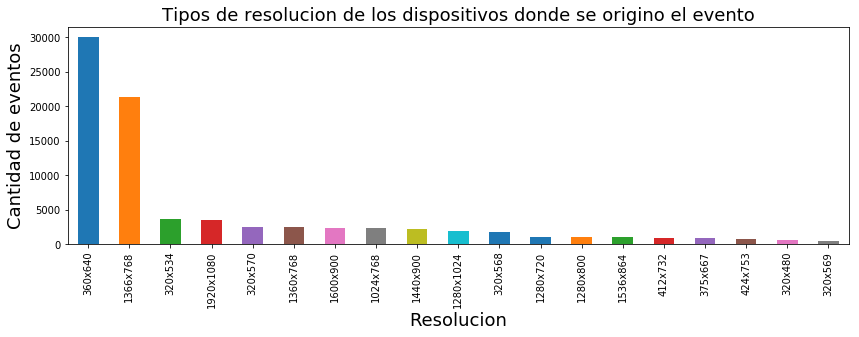

In [45]:
#tipos de resoluciones de los dispositivos donde se origino el evento
dfFiltradoR = df.loc[df['screen_resolution'] != 'NaN', :]
dfFiltradoR = df.loc[df['screen_resolution'] != 'Unknown', :]
plotCELR=dfFiltradoR['screen_resolution'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotCELR.set_title("Tipos de resolucion de los dispositivos donde se origino el evento", fontsize=18)
plotCELR.set_xlabel("Resolucion",fontsize=18)
plotCELR.set_ylabel("Cantidad de eventos", fontsize=18)


In [46]:
dfFiltradoR['screen_resolution'].value_counts()[0:5]

360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
Name: screen_resolution, dtype: int64

### Creamos una tabla para tener más detalles

In [79]:
pd.crosstab(df.screen_resolution,df.event)

event,visited site
screen_resolution,
1000x750,1
1007x569,1
1012x569,1
1024x1024,10
1024x552,4
1024x576,8
1024x600,317
1024x615,2
1024x640,4


##### Respecto a los tipos de resolución de los dispositivos usados para generar eventos tenemos el top5: 360x640 (300009)(Smartphone), 1366x768(Computer), 320x534(Smartphone),1920x1080(Computer) y por ultimo 320x570(Smartphone).

### Analisamos los diferentes tipos de Sistemas Operativos del dispositivo donde se origino el evento

Text(0,0.5,'Cantidad de eventos')

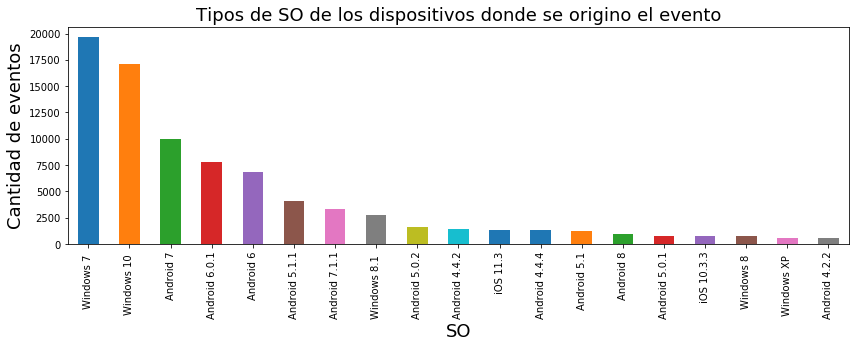

In [47]:
# tipos de so de los dispositivos donde se origino el evento. 
dfFiltradoSO = df.loc[df['operating_system_version'] != 'NaN', :]
dfFiltradoSO = df.loc[df['operating_system_version'] != 'Unknown', :]
plotCELSO=dfFiltradoSO['operating_system_version'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotCELSO.set_title("Tipos de SO de los dispositivos donde se origino el evento", fontsize=18)
plotCELSO.set_xlabel("SO",fontsize=18)
plotCELSO.set_ylabel("Cantidad de eventos", fontsize=18)

In [48]:
dfFiltradoSO['operating_system_version'].value_counts()[0:15]

Windows 7        19675
Windows 10       17110
Android 7         9964
Android 6.0.1     7805
Android 6         6871
Android 5.1.1     4123
Android 7.1.1     3325
Windows 8.1       2781
Android 5.0.2     1640
Android 4.4.2     1402
iOS 11.3          1345
Android 4.4.4     1288
Android 5.1       1269
Android 8          973
Android 5.0.1      746
Name: operating_system_version, dtype: int64

##### Los sistemas operativos más usados son, windows 7, 10 principalmente, después Android entre la version 7 y descendiendo hasta la 4.4.4; entre otros se encuentra el iOS 11.3 .

### Tabla para obtener más detalle

In [78]:
pd.crosstab(df.operating_system_version,df.event)
#Se detallan los tipos de eventos, en este caso, solo visited site se encuentra en la lista.

event,visited site
operating_system_version,
Android,16
Android 2.3.6,8
Android 3.1,2
Android 3.2,1
Android 4.0.3,1
Android 4.0.4,53
Android 4.1.1,5
Android 4.1.2,519
Android 4.2.2,566


### Analisis del canal donde se origino el evento

Text(0,0.5,'Cantidad de eventos')

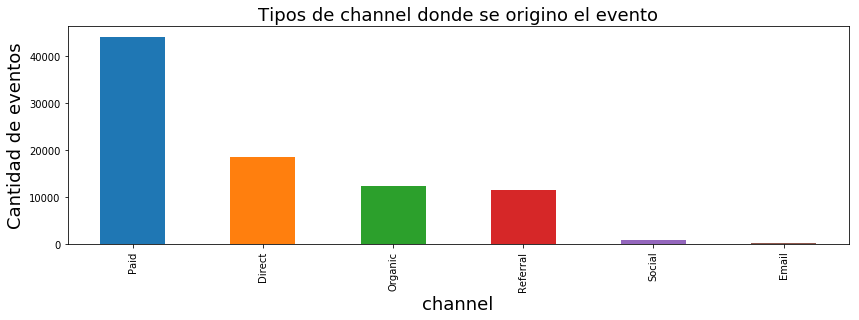

In [50]:
#Tipo de canal donde se origino el evento
dfFiltradoCH = df.loc[df['channel'] != 'NaN', :]
dfFiltradoCH = dfFiltradoCH.loc[df['channel'] != 'Unknown', :]
plotCH=dfFiltradoCH['channel'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotCH.set_title("Tipos de channel donde se origino el evento", fontsize=18)
plotCH.set_xlabel("channel",fontsize=18)
plotCH.set_ylabel("Cantidad de eventos", fontsize=18)


In [51]:
dfFiltradoCH['channel'].value_counts()[0:19]

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Name: channel, dtype: int64

In [77]:
pd.crosstab(df.channel,df.event)
#Se detalla el tipo de evento , en este caso es para visitar el sitio

event,visited site
channel,
Direct,18522
Email,76
Organic,12348
Paid,44193
Referral,11384
Social,846
Unknown,9


### Analisis de los diferentes tipos de motores de busqueda para acceder a la página y generar eventos

#### Apreciamos un gráfico con escala logaritmica para poder observar mejor los datos, ya que google tiene muchos más eventos.

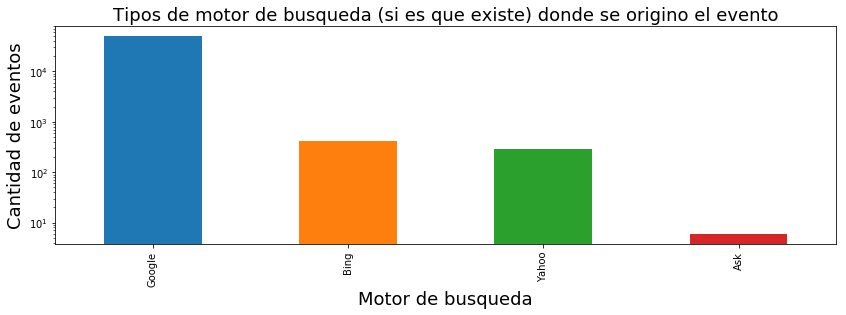

In [13]:
#Si es que viene de un motor de busqueda, ¿de cual?

dfFiltradoSE = df.loc[df['search_engine'] != 'NaN', :]
dfFiltradoSE = dfFiltradoSE.loc[df['search_engine'] != 'Unknown', :]
plotSE=dfFiltradoSE ['search_engine'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotSE.set_title("Tipos de motor de busqueda (si es que existe) donde se origino el evento", fontsize=18)
plotSE.set_xlabel("Motor de busqueda",fontsize=18)
plotSE.set_ylabel("Cantidad de eventos", fontsize=18)
plotSE.set_yscale('log')

In [38]:
pd.crosstab(df.search_engine,df.event)
#podemos ver que el usuario ingresa al sitio mediante un motor de búsqueda web.
#se detallan a continuacion los motores de busqueda contra los tipos de eventos.


event,search engine hit
search_engine,
Ask,6
Bing,424
Google,50240
Yahoo,287


##### Analizamos los diferentes motores de búsqueda donde se orginan los eventos, creamos un grafico en escala logarítmica, porque google tiene muchos más eventos que los demás motores de búsqueda, podemos observar que los otros motores de busqueda son Bing, Yahoo y Ask. 

### Analisis de los tipos de navegadores que se usaron en el evento

Text(0,0.5,'Cantidad de eventos')

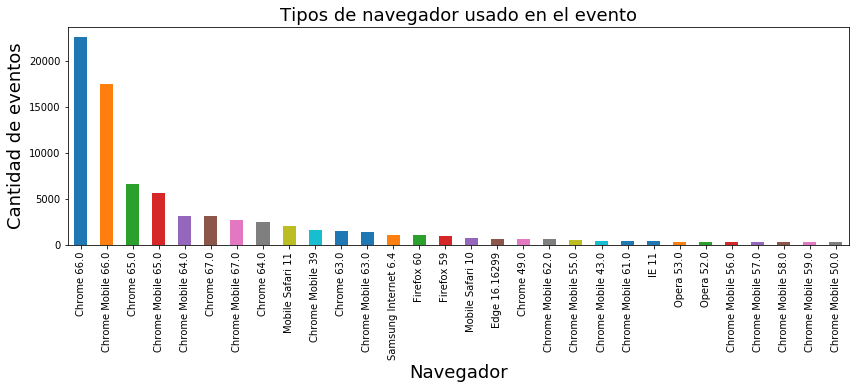

In [56]:
#tipo de navegador usado en el evento

dfFiltradoBV = df.loc[df['browser_version'] != 'NaN', :]
dfFiltradoBV = dfFiltradoBV.loc[df['browser_version'] != 'Unknown', :]
plotBV=dfFiltradoBV ['browser_version'].value_counts()[0:30].plot(kind='bar',figsize=(14,4));
plotBV.set_title("Tipos de navegador usado en el evento", fontsize=18)
plotBV.set_xlabel("Navegador",fontsize=18)
plotBV.set_ylabel("Cantidad de eventos", fontsize=18)


In [57]:
dfFiltradoBV ['browser_version'].value_counts()[0:30]

Chrome 66.0             22611
Chrome Mobile 66.0      17513
Chrome 65.0              6635
Chrome Mobile 65.0       5665
Chrome Mobile 64.0       3083
Chrome 67.0              3073
Chrome Mobile 67.0       2683
Chrome 64.0              2450
Mobile Safari 11         2071
Chrome Mobile 39         1639
Chrome 63.0              1490
Chrome Mobile 63.0       1413
Samsung Internet 6.4     1056
Firefox 60               1049
Firefox 59                918
Mobile Safari 10          703
Edge 16.16299             658
Chrome 49.0               602
Chrome Mobile 62.0        568
Chrome Mobile 55.0        527
Chrome Mobile 43.0        422
Chrome Mobile 61.0        390
IE 11                     385
Opera 53.0                271
Opera 52.0                269
Chrome Mobile 56.0        264
Chrome Mobile 57.0        262
Chrome Mobile 58.0        255
Chrome Mobile 59.0        254
Chrome Mobile 50.0        246
Name: browser_version, dtype: int64

In [76]:
pd.crosstab(df.browser_version,df.event)
#diferentes tipos de eventos x (visited site) contra navegador usado

event,visited site
browser_version,
Amazon Silk 66.3,3
Android 2.3,6
Android 3.1,2
Android 3.2,1
Android 4.0,45
Android 4.1,67
Android 4.2,55
Android 4.3,15
Android 4.4,100


##### Por ultimo hablaremos de los navegadores usados para entrar a la página, Google Chrome esta en el primer puesto y compiten con sus diferentes versiones.  Chrome 66.0, Chrome Mobile 66.0, Chrome 65.0, Chrome Mobile 65.0 (entre otras versiones); también podemos observar el navegador Safari, Samsung internet, Firefox, Edge, IE 11 y Opera.